In [1]:
#Handle Imbalanced Data

In [2]:
"""
There are two techniques used to convert imbalanced data set into balanced data set.
1.Up sampling
2.Down sampling

"""

'\nThere are two techniques used to convert imbalanced data set into balanced data set.\n1.Up sampling\n2.Down sampling\n\n'

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns

In [12]:
np.random.seed(123)
n_sample = 1000

class_0_ratio = 0.9
class_0 = int(n_sample*class_0_ratio)
class_1 = n_sample-class_0

In [13]:
class_0,class_1

(900, 100)

In [14]:
class_0_df = pd.DataFrame({"feature1":np.random.normal(loc = 0,scale = 1,size = class_0),
                          "feature2":np.random.normal(loc=0,scale=1,size = class_0),
                          'target':[0]*class_0})

In [15]:
class_1_df = pd.DataFrame({"feature1":np.random.normal(loc = 2,scale = 1,size = class_1),
                          "feature2":np.random.normal(loc=2,scale=1,size = class_1),
                          'target':[1]*class_1})

In [16]:
class_0_df

,feature1,feature2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


In [17]:
class_1_df

,feature1,feature2,target
0,1.699768,2.139033,1
1,1.367739,2.025577,1
2,1.795683,1.803557,1
3,2.213696,3.312255,1
4,3.033878,3.187417,1
...,...,...,...
95,1.376371,2.845701,1
96,2.239810,0.880077,1
97,1.131760,1.640703,1
98,2.902006,0.390305,1


In [18]:
df  = pd.concat([class_0_df,class_1_df]).reset_index(drop = True)

In [19]:
df.head()

,feature1,feature2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [20]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [30]:
from sklearn.utils import  resample

In [31]:
majority_ele = df[df['target']==0]
minority_ele = df[df['target']==1]

In [32]:
majority_ele.shape

(900, 3)

In [33]:
minority_ele.shape


(100, 3)

In [36]:
df_upsample_minority = resample(minority_ele,
                                replace=True,
                                n_samples=len(majority_ele),
                                random_state=23)

In [39]:
df_upsample_minority

,feature1,feature2,target
983,2.844335,2.015572,1
940,2.013560,2.847260,1
973,2.572843,1.274827,1
954,1.487494,3.310876,1
931,2.540392,3.092068,1
...,...,...,...
965,3.919526,1.980541,1
995,1.376371,2.845701,1
979,0.868043,2.309863,1
976,2.810326,3.604614,1


In [41]:
df = pd.concat([majority_ele,df_upsample_minority])

In [43]:
df['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

<AxesSubplot: xlabel='target', ylabel='Count'>

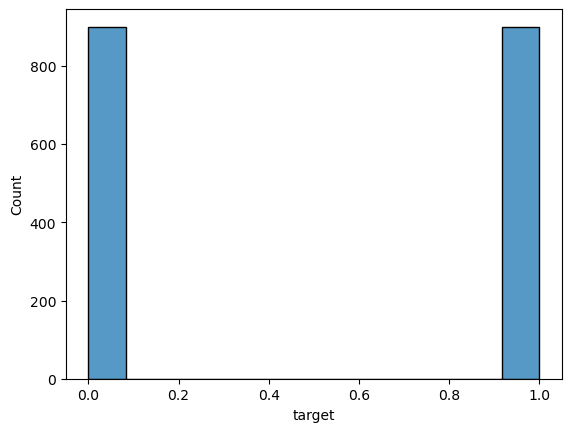

In [44]:
sns.histplot(df['target'])

In [45]:
#Down sampling

In [46]:
class_0_df = pd.DataFrame({"feature1":np.random.normal(loc = 0,scale = 1,size = class_0),
                          "feature2":np.random.normal(loc=0,scale=1,size = class_0),
                          'target':[0]*class_0})
class_1_df = pd.DataFrame({"feature1":np.random.normal(loc = 2,scale = 1,size = class_1),
                          "feature2":np.random.normal(loc=2,scale=1,size = class_1),
                          'target':[1]*class_1})
df  = pd.concat([class_0_df,class_1_df]).reset_index(drop = True)

In [47]:
df_down_sampling = resample(majority_ele,replace=True,n_samples=len(minority_ele),random_state=21)

In [48]:
df_down_sampling

,feature1,feature2,target
207,-0.915307,-0.613327,0
824,0.103568,-0.808899,0
772,0.052806,1.474405,0
48,0.978736,0.101467,0
368,0.419568,-0.944889,0
...,...,...,...
206,-0.086522,0.452216,0
303,0.611124,0.988925,0
5,1.651437,-0.116932,0
683,-0.307774,0.812812,0


In [51]:
df = pd.concat([minority_ele,df_down_sampling]).reset_index(drop = True)

In [52]:
df

,feature1,feature2,target
0,1.699768,2.139033,1
1,1.367739,2.025577,1
2,1.795683,1.803557,1
3,2.213696,3.312255,1
4,3.033878,3.187417,1
...,...,...,...
195,-0.086522,0.452216,0
196,0.611124,0.988925,0
197,1.651437,-0.116932,0
198,-0.307774,0.812812,0


In [53]:
df.shape

(200, 3)

In [55]:
df['target'].value_counts()

1    100
0    100
Name: target, dtype: int64

<AxesSubplot: xlabel='target', ylabel='Count'>

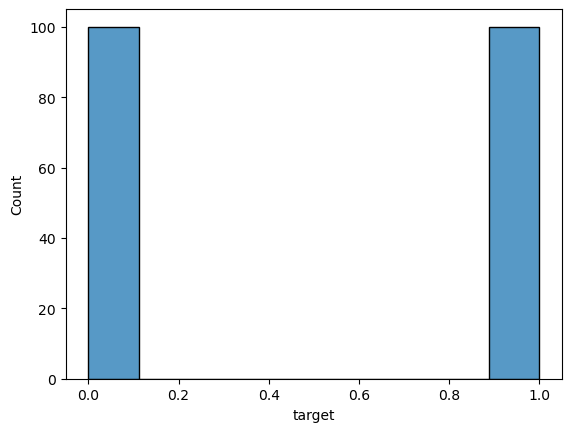

In [56]:
sns.histplot(df['target'])